## 커피 경험과 선호도의 상관관계 : 커피에 대한 전문성 수준과 커피의 선호도

In [1]:
import numpy as np
import pandas as pd

In [2]:
coffee = pd.read_csv('GACTT_RESULTS_ANONYMIZED.csv')
coffee

,Submission ID,Respondent ID,Submitted at,What is your age?,What is your ZIP code?,How many cups of coffee do you typically drink per day?,Where do you typically drink coffee?,Where do you typically drink coffee? (At home),Where do you typically drink coffee? (At the office),Where do you typically drink coffee? (On the go),...,Gender,Gender (please specify),Marital Status,Household Income,Education Level,Ethnicity/Race,Ethnicity/Race (please specify),Employment Status,Number of Children,Political Affiliation
0,gMR29l,vDzkBA,9/11/23 20:50,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BkPN0e,9Z4VME,9/11/23 20:52,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W5G8jj,XoNLQj,9/12/23 1:33,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4xWgGr,Gp7gde,9/12/23 12:58,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,QD27Q8,Bp9ogQ,9/12/23 15:24,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,PA44VP,pD6v5B,10/26/23 23:27,>65 years old,35126,2,At home,True,False,False,...,Female,NaN,Married,"$100,000 - $149,999",Master's degree,White/Caucasian,NaN,Retired,2,Democrat
4038,vNgpPD,pD6v5B,10/26/23 23:31,>65 years old,35126,2,At home,True,False,False,...,Male,NaN,Married,"$100,000 - $149,999",Bachelor's degree,White/Caucasian,NaN,Retired,2,Republican
4039,g5ggRM,O7ekrg,10/26/23 23:32,18-24 years old,60131,1,"At a cafe, At home, On the go, At the office",True,True,True,...,Male,NaN,Married,"$100,000 - $149,999",Some college or associate's degree,White/Caucasian,NaN,Employed full-time,None,Democrat
4040,rlgbDN,N79OOb,10/27/23 0:43,25-34 years old,2351,2,At home,True,False,False,...,Male,NaN,Single,"$25,000 - $49,999",Bachelor's degree,White/Caucasian,NaN,Unemployed,None,Democrat


In [3]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4042 entries, 0 to 4041
Columns: 118 entries, Submission ID to Political Affiliation
dtypes: float64(21), object(97)
memory usage: 3.6+ MB


In [5]:
coffee.shape

(4042, 118)

In [10]:
coffee.columns.tolist()

['Submission ID',
 'Respondent ID',
 'Submitted at',
 'What is your age?',
 'What is your ZIP code?',
 'How many cups of coffee do you typically drink per day?',
 'Where do you typically drink coffee?',
 'Where do you typically drink coffee? (At home)',
 'Where do you typically drink coffee? (At the office)',
 'Where do you typically drink coffee? (On the go)',
 'Where do you typically drink coffee? (At a cafe)',
 'Where do you typically drink coffee? (None of these)',
 'How do you brew coffee at home?',
 'How do you brew coffee at home? (Pour over)',
 'How do you brew coffee at home? (French press)',
 'How do you brew coffee at home? (Espresso)',
 'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
 'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
 'How do you brew coffee at home? (Instant coffee)',
 'How do you brew coffee at home? (Bean-to-cup machine)',
 'How do you brew coffee at home? (Cold brew)',
 'How do you brew coffee

In [ ]:
필요없는 열 삭제

In [13]:
data = coffee.drop(['Submission ID',
 'Respondent ID',
 'Submitted at',
 'What is your age?',
 'What is your ZIP code?',
 'How many cups of coffee do you typically drink per day?',
 'Where do you typically drink coffee?',
 'Where do you typically drink coffee? (At home)',
 'Where do you typically drink coffee? (At the office)',
 'Where do you typically drink coffee? (On the go)',
 'Where do you typically drink coffee? (At a cafe)',
 'Where do you typically drink coffee? (None of these)',
 'Do you work from home or in person?',
 'Gender',
 'Gender (please specify)',
 'Marital Status',
 'Household Income',
 'Education Level',
 'Ethnicity/Race',
 'Ethnicity/Race (please specify)',
 'Employment Status',
 'Number of Children',
 'Political Affiliation'], axis=1)

data.head(10)

,How do you brew coffee at home?,How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),How else do you brew coffee at home?,"On the go, where do you typically purchase coffee?","On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",Where else do you purchase coffee?,What is your favorite coffee drink?,Please specify what your favorite coffee drink is,Do you usually add anything to your coffee?,Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),What else do you add to your coffee?,What kind of dairy do you add?,What kind of dairy do you add? (Whole milk),What kind of dairy do you add? (Skim milk),What kind of dairy do you add? (Half and half),What kind of dairy do you add? (Coffee creamer),What kind of dairy do you add? (Flavored coffee creamer),What kind of dairy do you add? (Oat milk),What kind of dairy do you add? (Almond milk),What kind of dairy do you add? (Soy milk),What kind of dairy do you add? (Other),What kind of sugar or sweetener do you add?,What kind of sugar or sweetener do you add? (Granulated Sugar),"What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))",What kind of sugar or sweetener do you add? (Honey),What kind of sugar or sweetener do you add? (Maple Syrup),What kind of sugar or sweetener do you add? (Stevia),What kind of sugar or sweetener do you add? (Agave Nectar),What kind of sugar or sweetener do you add? (Brown Sugar),What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado)),What kind of flavorings do you add?,What kind of flavorings do you add? (Vanilla Syrup),What kind of flavorings do you add? (Caramel Syrup),What kind of flavorings do you add? (Hazelnut Syrup),What kind of flavorings do you add? (Cinnamon (Ground or Stick)),What kind of flavorings do you add? (Peppermint Syrup),What kind of flavorings do you add? (Other),What other flavoring do you use?,"Before today's tasting, which of the following best described what kind of coffee you like?",How strong do you like your coffee?,What roast level of coffee do you prefer?,How much caffeine do you like in your coffee?,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee A - Notes,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee B - Notes,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee C - Notes,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,Coffee D - Notes,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?","In total, much money do you typically spend on coffee in a month?",Why do you drink coffee?,Why do you drink coffee? (It tastes good),Why do you drink coffee? (I need the caffeine),Why do you drink 

### 컬럼 정리

In [21]:
# 인코딩된 컬럼만 추출
brewing = [col for col in data.columns if col.startswith('How do you brew coffee at home?') and col != 'How do you brew coffee at home?']

# True/False 컬럼을 명확히 boolean 타입으로 변환
data[brewing] = data[brewing].astype(bool)

# `True`인 컬럼을 기반으로 새로운 컬럼 생성
data['Brewing Method'] = data[brewing].idxmax(axis=1)

In [22]:
# 컬럼명 정리 (괄호 안의 부분만 추출)
data['Brewing Method'] = data['Brewing Method'].str.extract(r'\((.*?)\)')

print(data[['Brewing Method']])

                                  Brewing Method
0                                      Pour over
1     Pod/capsule machine (e.g. Keurig/Nespresso
2                            Bean-to-cup machine
3        Coffee brewing machine (e.g. Mr. Coffee
4                                      Pour over
...                                          ...
4037     Coffee brewing machine (e.g. Mr. Coffee
4038     Coffee brewing machine (e.g. Mr. Coffee
4039                                    Espresso
4040                                   Pour over
4041                                   Pour over

[4042 rows x 1 columns]


In [19]:
# 인코딩된 컬럼만 추출
place = [col for col in data.columns if col.startswith('On the go, where do you typically purchase coffee?') and col != 'On the go, where do you typically purchase coffee?']

# True/False 컬럼을 명확히 boolean 타입으로 변환
data[place] = data[place].astype(bool)

# `True`인 컬럼을 기반으로 새로운 컬럼 생성
data['Purchasing Place'] = data[place].idxmax(axis=1)

In [23]:
# 컬럼명 정리 (괄호 안의 부분만 추출)
data['Purchasing Place'] = data['Purchasing Place'].str.extract(r'\((.*?)\)')

print(data[['Purchasing Place']])

                            Purchasing Place
0     National chain (e.g. Starbucks, Dunkin
1     National chain (e.g. Starbucks, Dunkin
2     National chain (e.g. Starbucks, Dunkin
3     National chain (e.g. Starbucks, Dunkin
4     National chain (e.g. Starbucks, Dunkin
...                                      ...
4037  National chain (e.g. Starbucks, Dunkin
4038  National chain (e.g. Starbucks, Dunkin
4039  National chain (e.g. Starbucks, Dunkin
4040  National chain (e.g. Starbucks, Dunkin
4041  National chain (e.g. Starbucks, Dunkin

[4042 rows x 1 columns]


In [24]:
# 인코딩된 컬럼만 추출
add = [col for col in data.columns if col.startswith('Do you usually add anything to your coffee?') and col != 'Do you usually add anything to your coffee?']

# True/False 컬럼을 명확히 boolean 타입으로 변환
data[add] = data[add].astype(bool)

# `True`인 컬럼을 기반으로 새로운 컬럼 생성
data['Add Thing'] = data[add].idxmax(axis=1)

# 컬럼명 정리 (괄호 안의 부분만 추출)
data['Add Thing'] = data['Add Thing'].str.extract(r'\((.*?)\)')

print(data[['Add Thing']])

                                       Add Thing
0                                No - just black
1                                No - just black
2                                No - just black
3                                No - just black
4                                No - just black
...                                          ...
4037  Milk, dairy alternative, or coffee creamer
4038  Milk, dairy alternative, or coffee creamer
4039                             No - just black
4040  Milk, dairy alternative, or coffee creamer
4041  Milk, dairy alternative, or coffee creamer

[4042 rows x 1 columns]


In [25]:
# 인코딩된 컬럼만 추출
dairy = [col for col in data.columns if col.startswith('What kind of dairy do you add?') and col != 'What kind of dairy do you add?']

# True/False 컬럼을 명확히 boolean 타입으로 변환
data[dairy] = data[dairy].astype(bool)

# `True`인 컬럼을 기반으로 새로운 컬럼 생성
data['Dairy'] = data[dairy].idxmax(axis=1)

# 컬럼명 정리 (괄호 안의 부분만 추출)
data['Dairy'] = data['Dairy'].str.extract(r'\((.*?)\)')

print(data[['Dairy']])

               Dairy
0         Whole milk
1         Whole milk
2         Whole milk
3         Whole milk
4         Whole milk
...              ...
4037       Skim milk
4038       Skim milk
4039  Coffee creamer
4040      Whole milk
4041      Whole milk

[4042 rows x 1 columns]


In [26]:
# 인코딩된 컬럼만 추출
sweet = [col for col in data.columns if col.startswith('What kind of sugar or sweetener do you add?') and col != 'What kind of sugar or sweetener do you add?']

# True/False 컬럼을 명확히 boolean 타입으로 변환
data[sweet] = data[sweet].astype(bool)

# `True`인 컬럼을 기반으로 새로운 컬럼 생성
data['Sweetener'] = data[sweet].idxmax(axis=1)

# 컬럼명 정리 (괄호 안의 부분만 추출)
data['Sweetener'] = data['Sweetener'].str.extract(r'\((.*?)\)')

print(data[['Sweetener']])

             Sweetener
0     Granulated Sugar
1     Granulated Sugar
2     Granulated Sugar
3     Granulated Sugar
4     Granulated Sugar
...                ...
4037  Granulated Sugar
4038  Granulated Sugar
4039  Granulated Sugar
4040  Granulated Sugar
4041  Granulated Sugar

[4042 rows x 1 columns]


In [27]:
# 인코딩된 컬럼만 추출
flavor = [col for col in data.columns if col.startswith('What kind of flavorings do you add?') and col != 'What kind of flavorings do you add?']

# True/False 컬럼을 명확히 boolean 타입으로 변환
data[flavor] = data[flavor].astype(bool)

# `True`인 컬럼을 기반으로 새로운 컬럼 생성
data['Flavoring'] = data[flavor].idxmax(axis=1)

# 컬럼명 정리 (괄호 안의 부분만 추출)
data['Flavoring'] = data['Flavoring'].str.extract(r'\((.*?)\)')

print(data[['Flavoring']])

          Flavoring
0     Vanilla Syrup
1     Vanilla Syrup
2     Vanilla Syrup
3     Vanilla Syrup
4     Vanilla Syrup
...             ...
4037  Vanilla Syrup
4038  Vanilla Syrup
4039  Vanilla Syrup
4040  Vanilla Syrup
4041  Vanilla Syrup

[4042 rows x 1 columns]


In [28]:
# 인코딩된 컬럼만 추출
reason = [col for col in data.columns if col.startswith('Why do you drink coffee?') and col != 'Why do you drink coffee?']

# True/False 컬럼을 명확히 boolean 타입으로 변환
data[reason] = data[reason].astype(bool)

# `True`인 컬럼을 기반으로 새로운 컬럼 생성
data['Reason'] = data[reason].idxmax(axis=1)

# 컬럼명 정리 (괄호 안의 부분만 추출)
data['Reason'] = data['Reason'].str.extract(r'\((.*?)\)')

print(data[['Reason']])

                   Reason
0          It tastes good
1          It tastes good
2          It tastes good
3          It tastes good
4          It tastes good
...                   ...
4037       It tastes good
4038  I need the caffeine
4039       It tastes good
4040       It tastes good
4041       It tastes good

[4042 rows x 1 columns]


In [29]:
data.head()

,How do you brew coffee at home?,How do you brew coffee at home? (Pour over),How do you brew coffee at home? (French press),How do you brew coffee at home? (Espresso),How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee)),How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso)),How do you brew coffee at home? (Instant coffee),How do you brew coffee at home? (Bean-to-cup machine),How do you brew coffee at home? (Cold brew),How do you brew coffee at home? (Coffee extract (e.g. Cometeer)),How do you brew coffee at home? (Other),How else do you brew coffee at home?,"On the go, where do you typically purchase coffee?","On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))","On the go, where do you typically purchase coffee? (Local cafe)","On the go, where do you typically purchase coffee? (Drive-thru)","On the go, where do you typically purchase coffee? (Specialty coffee shop)","On the go, where do you typically purchase coffee? (Deli or supermarket)","On the go, where do you typically purchase coffee? (Other)",Where else do you purchase coffee?,What is your favorite coffee drink?,Please specify what your favorite coffee drink is,Do you usually add anything to your coffee?,Do you usually add anything to your coffee? (No - just black),"Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)",Do you usually add anything to your coffee? (Sugar or sweetener),Do you usually add anything to your coffee? (Flavor syrup),Do you usually add anything to your coffee? (Other),What else do you add to your coffee?,What kind of dairy do you add?,What kind of dairy do you add? (Whole milk),What kind of dairy do you add? (Skim milk),What kind of dairy do you add? (Half and half),What kind of dairy do you add? (Coffee creamer),What kind of dairy do you add? (Flavored coffee creamer),What kind of dairy do you add? (Oat milk),What kind of dairy do you add? (Almond milk),What kind of dairy do you add? (Soy milk),What kind of dairy do you add? (Other),What kind of sugar or sweetener do you add?,What kind of sugar or sweetener do you add? (Granulated Sugar),"What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))",What kind of sugar or sweetener do you add? (Honey),What kind of sugar or sweetener do you add? (Maple Syrup),What kind of sugar or sweetener do you add? (Stevia),What kind of sugar or sweetener do you add? (Agave Nectar),What kind of sugar or sweetener do you add? (Brown Sugar),What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado)),What kind of flavorings do you add?,What kind of flavorings do you add? (Vanilla Syrup),What kind of flavorings do you add? (Caramel Syrup),What kind of flavorings do you add? (Hazelnut Syrup),What kind of flavorings do you add? (Cinnamon (Ground or Stick)),What kind of flavorings do you add? (Peppermint Syrup),What kind of flavorings do you add? (Other),What other flavoring do you use?,"Before today's tasting, which of the following best described what kind of coffee you like?",How strong do you like your coffee?,What roast level of coffee do you prefer?,How much caffeine do you like in your coffee?,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee A - Notes,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee B - Notes,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee C - Notes,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,Coffee D - Notes,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?","In total, much money do you typically spend on coffee in a month?",Why do you drink coffee?,Why do you drink coffee? (It tastes good),Why do you drink coffee? (I need the caffeine),Why do you drink 

In [30]:
 data.drop(['How do you brew coffee at home?',
 'How do you brew coffee at home? (Pour over)',
 'How do you brew coffee at home? (French press)',
 'How do you brew coffee at home? (Espresso)',
 'How do you brew coffee at home? (Coffee brewing machine (e.g. Mr. Coffee))',
 'How do you brew coffee at home? (Pod/capsule machine (e.g. Keurig/Nespresso))',
 'How do you brew coffee at home? (Instant coffee)',
 'How do you brew coffee at home? (Bean-to-cup machine)',
 'How do you brew coffee at home? (Cold brew)',
 'How do you brew coffee at home? (Coffee extract (e.g. Cometeer))',
 'How do you brew coffee at home? (Other)',
 'How else do you brew coffee at home?',
 'On the go, where do you typically purchase coffee?',
 'On the go, where do you typically purchase coffee? (National chain (e.g. Starbucks, Dunkin))',
 'On the go, where do you typically purchase coffee? (Local cafe)',
 'On the go, where do you typically purchase coffee? (Drive-thru)',
 'On the go, where do you typically purchase coffee? (Specialty coffee shop)',
 'On the go, where do you typically purchase coffee? (Deli or supermarket)',
 'On the go, where do you typically purchase coffee? (Other)',
 'Where else do you purchase coffee?',
 'Do you usually add anything to your coffee?',
 'Do you usually add anything to your coffee? (No - just black)',
 'Do you usually add anything to your coffee? (Milk, dairy alternative, or coffee creamer)',
 'Do you usually add anything to your coffee? (Sugar or sweetener)',
 'Do you usually add anything to your coffee? (Flavor syrup)',
 'Do you usually add anything to your coffee? (Other)',
 'What else do you add to your coffee?',
 'What kind of dairy do you add?',
 'What kind of dairy do you add? (Whole milk)',
 'What kind of dairy do you add? (Skim milk)',
 'What kind of dairy do you add? (Half and half)',
 'What kind of dairy do you add? (Coffee creamer)',
 'What kind of dairy do you add? (Flavored coffee creamer)',
 'What kind of dairy do you add? (Oat milk)',
 'What kind of dairy do you add? (Almond milk)',
 'What kind of dairy do you add? (Soy milk)',
 'What kind of dairy do you add? (Other)',
 'What kind of sugar or sweetener do you add?',
 'What kind of sugar or sweetener do you add? (Granulated Sugar)',
 'What kind of sugar or sweetener do you add? (Artificial Sweeteners (e.g., Splenda))',
 'What kind of sugar or sweetener do you add? (Honey)',
 'What kind of sugar or sweetener do you add? (Maple Syrup)',
 'What kind of sugar or sweetener do you add? (Stevia)',
 'What kind of sugar or sweetener do you add? (Agave Nectar)',
 'What kind of sugar or sweetener do you add? (Brown Sugar)',
 'What kind of sugar or sweetener do you add? (Raw Sugar (Turbinado))',
 'What kind of flavorings do you add?',
 'What kind of flavorings do you add? (Vanilla Syrup)',
 'What kind of flavorings do you add? (Caramel Syrup)',
 'What kind of flavorings do you add? (Hazelnut Syrup)',
 'What kind of flavorings do you add? (Cinnamon (Ground or Stick))',
 'What kind of flavorings do you add? (Peppermint Syrup)',
 'What kind of flavorings do you add? (Other)',
 'What other flavoring do you use?',
 'Why do you drink coffee?',
 'Why do you drink coffee? (It tastes good)',
 'Why do you drink coffee? (I need the caffeine)',
 'Why do you drink coffee? (I need the ritual)',
 'Why do you drink coffee? (It makes me go to the bathroom)',
 'Why do you drink coffee? (Other)',
 'Other reason for drinking coffee'], axis=1, inplace=True)

In [32]:
data.head()

,What is your favorite coffee drink?,Please specify what your favorite coffee drink is,"Before today's tasting, which of the following best described what kind of coffee you like?",How strong do you like your coffee?,What roast level of coffee do you prefer?,How much caffeine do you like in your coffee?,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee A - Notes,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee B - Notes,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee C - Notes,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,Coffee D - Notes,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?","In total, much money do you typically spend on coffee in a month?",Do you like the taste of coffee?,Do you know where your coffee comes from?,What is the most you've ever paid for a cup of coffee?,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Brewing Method,Purchasing Place,Add Thing,Dairy,Sweetener,Flavoring,Reason
0,Regular drip coffee,NaN,Complex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
1,Iced coffee,NaN,Light,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pod/capsule machine (e.g. Keurig/Nespresso,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
2,Regular drip coffee,NaN,Complex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bean-to-cup machine,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
3,Iced coffee,NaN,Complex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Coffee brewing machine (e.g. Mr. Coffee,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
4,Latte,NaN,Sweet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good


### 결측치 처리

In [34]:
data.isnull().sum()

What is your favorite coffee drink?                                                                   62
Please specify what your favorite coffee drink is                                                   3926
Before today's tasting, which of the following best described what kind of coffee you like?           84
How strong do you like your coffee?                                                                  126
What roast level of coffee do you prefer?                                                            102
How much caffeine do you like in your coffee?                                                        125
Lastly, how would you rate your own coffee expertise?                                                104
Coffee A - Bitterness                                                                                244
Coffee A - Acidity                                                                                   263
Coffee A - Personal Preference                         

#### 결측치가 1000개 이상인 열 삭제

In [36]:
data.drop(['Please specify what your favorite coffee drink is', 
           'Coffee A - Notes', 'Coffee B - Notes', 'Coffee C - Notes', 'Coffee D - Notes'],  axis=1, inplace=True)
data.isnull().sum()

What is your favorite coffee drink?                                                                  62
Before today's tasting, which of the following best described what kind of coffee you like?          84
How strong do you like your coffee?                                                                 126
What roast level of coffee do you prefer?                                                           102
How much caffeine do you like in your coffee?                                                       125
Lastly, how would you rate your own coffee expertise?                                               104
Coffee A - Bitterness                                                                               244
Coffee A - Acidity                                                                                  263
Coffee A - Personal Preference                                                                      253
Coffee B - Bitterness                                           

#### 결측치가 있는 행 삭제

In [37]:
data_cleaned = data.dropna()
data_cleaned

,What is your favorite coffee drink?,"Before today's tasting, which of the following best described what kind of coffee you like?",How strong do you like your coffee?,What roast level of coffee do you prefer?,How much caffeine do you like in your coffee?,"Lastly, how would you rate your own coffee expertise?",Coffee A - Bitterness,Coffee A - Acidity,Coffee A - Personal Preference,Coffee B - Bitterness,Coffee B - Acidity,Coffee B - Personal Preference,Coffee C - Bitterness,Coffee C - Acidity,Coffee C - Personal Preference,Coffee D - Bitterness,Coffee D - Acidity,Coffee D - Personal Preference,"Between Coffee A, Coffee B, and Coffee C which did you prefer?","Between Coffee A and Coffee D, which did you prefer?","Lastly, what was your favorite overall coffee?","In total, much money do you typically spend on coffee in a month?",Do you like the taste of coffee?,Do you know where your coffee comes from?,What is the most you've ever paid for a cup of coffee?,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Brewing Method,Purchasing Place,Add Thing,Dairy,Sweetener,Flavoring,Reason
34,Regular drip coffee,Floral,Medium,Light,Full caffeine,8.0,3.0,3.0,4.0,3.0,3.0,5.0,4.0,3.0,3.0,5.0,2.0,3.0,Coffee B,Coffee A,Coffee B,$20-$40,Yes,Yes,$4-$6,$8-$10,No,$500-$1000,Yes,Pour over,Local cafe,No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
41,Pourover,Floral,Medium,Light,Full caffeine,10.0,1.0,4.0,4.0,1.0,4.0,4.0,1.0,4.0,4.0,2.0,4.0,4.0,Coffee A,Coffee A,Coffee A,$40-$60,Yes,Yes,$2-$4,More than $20,Yes,$50-$100,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
42,Iced coffee,Fruity,Very strong,Light,Full caffeine,6.0,1.0,4.0,3.0,3.0,2.0,4.0,3.0,4.0,1.0,1.0,4.0,5.0,Coffee A,Coffee D,Coffee D,$20-$40,Yes,Yes,$10-$15,More than $20,Yes,$100-$300,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
43,Pourover,Full Bodied,Somewhat strong,Dark,Full caffeine,7.0,2.0,3.0,4.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,Coffee A,Coffee A,Coffee A,$40-$60,Yes,Yes,$10-$15,$15-$20,Yes,$300-$500,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
46,Cappuccino,Floral,Somewhat strong,Blonde,Full caffeine,4.0,3.0,4.0,5.0,2.0,3.0,4.0,2.0,3.0,4.0,1.0,2.0,3.0,Coffee A,Coffee A,Coffee A,$60-$80,Yes,Yes,$6-$8,$4-$6,Yes,"More than $1,000",Yes,Espresso,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,Regular drip coffee,Chocolatey,Medium,Medium,Full caffeine,2.0,2.0,2.0,5.0,2.0,2.0,3.0,2.0,2.0,4.0,5.0,5.0,1.0,Coffee A,Coffee A,Coffee A,$20-$40,Yes,No,$6-$8,$4-$6,No,Less than $20,Yes,Coffee brewing machine (e.g. Mr. Coffee,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Skim milk,Granulated Sugar,Vanilla Syrup,It tastes good
4038,Regular drip coffee,Nutty,Medium,Light,Full caffeine,2.0,2.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,2.0,4.0,3.0,2.0,Coffee A,Coffee A,Coffee A,$20-$40,Yes,No,$4-$6,$2-$4,No,Less than $20,Yes,Coffee brewing machine (e.g. Mr. Coffee,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Skim milk,Granulated Sugar,Vanilla Syrup,I need the caffeine
4039,Latte,Sweet,Somewhat strong,Light,Full caffeine,5.0,2.0,3.0,3.0,5.0,3.0,4.0,3.0,1.0,1.0,1.0,4.0,5.0,Coffee B,Coffee D,Coffee C,$40-$60,Yes,Yes,$8-$10,More than $20,Yes,$300-$500,Ye

In [38]:
data_cleaned.isnull().sum()

What is your favorite coffee drink?                                                                 0
Before today's tasting, which of the following best described what kind of coffee you like?         0
How strong do you like your coffee?                                                                 0
What roast level of coffee do you prefer?                                                           0
How much caffeine do you like in your coffee?                                                       0
Lastly, how would you rate your own coffee expertise?                                               0
Coffee A - Bitterness                                                                               0
Coffee A - Acidity                                                                                  0
Coffee A - Personal Preference                                                                      0
Coffee B - Bitterness                                                             

In [ ]:
'Between Coffee A, Coffee B, and Coffee C which did you prefer?''Between Coffee A and Coffee D, which did you prefer?''

### 설명변수, 종속변수 설정

In [42]:
X = data_cleaned[['What is your favorite coffee drink?',
                              "Before today's tasting, which of the following best described what kind of coffee you like?",
                               'How strong do you like your coffee?',
                  'What roast level of coffee do you prefer?',
                               'How much caffeine do you like in your coffee?',
                               'Lastly, how would you rate your own coffee expertise?',
                               'In total, much money do you typically spend on coffee in a month?',
                               'Do you know where your coffee comes from?',
                               "What is the most you've ever paid for a cup of coffee?",
                               "What is the most you'd ever be willing to pay for a cup of coffee?",
                               "Do you feel like you’re getting good value for your money when you buy coffee at a cafe?",
                               "Approximately how much have you spent on coffee equipment in the past 5 years?",
                               "Do you feel like you’re getting good value for your money with regards to your coffee equipment?",
                               'Brewing Method',
                               'Purchasing Place',
                               'Add Thing',
                               'Dairy',
                               'Sweetener',
                               'Flavoring',
                               'Reason']]
y = data_cleaned[['Coffee A - Personal Preference', 'Coffee B - Personal Preference', 'Coffee C - Personal Preference', 'Coffee D - Personal Preference',
                'Lastly, what was your favorite overall coffee?']]

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3372 entries, 34 to 4041
Data columns (total 20 columns):
 #   Column                                                                                            Non-Null Count  Dtype  
---  ------                                                                                            --------------  -----  
 0   What is your favorite coffee drink?                                                               3372 non-null   object 
 1   Before today's tasting, which of the following best described what kind of coffee you like?       3372 non-null   object 
 2   How strong do you like your coffee?                                                               3372 non-null   object 
 3   What roast level of coffee do you prefer?                                                         3372 non-null   object 
 4   How much caffeine do you like in your coffee?                                                     3372 non-null   object 
 5 

In [43]:
df = pd.concat([X, y], axis=1)
df

,What is your favorite coffee drink?,"Before today's tasting, which of the following best described what kind of coffee you like?",How strong do you like your coffee?,What roast level of coffee do you prefer?,How much caffeine do you like in your coffee?,"Lastly, how would you rate your own coffee expertise?","In total, much money do you typically spend on coffee in a month?",Do you know where your coffee comes from?,What is the most you've ever paid for a cup of coffee?,What is the most you'd ever be willing to pay for a cup of coffee?,Do you feel like you’re getting good value for your money when you buy coffee at a cafe?,Approximately how much have you spent on coffee equipment in the past 5 years?,Do you feel like you’re getting good value for your money with regards to your coffee equipment?,Brewing Method,Purchasing Place,Add Thing,Dairy,Sweetener,Flavoring,Reason,Coffee A - Personal Preference,Coffee B - Personal Preference,Coffee C - Personal Preference,Coffee D - Personal Preference,"Lastly, what was your favorite overall coffee?"
34,Regular drip coffee,Floral,Medium,Light,Full caffeine,8.0,$20-$40,Yes,$4-$6,$8-$10,No,$500-$1000,Yes,Pour over,Local cafe,No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good,4.0,5.0,3.0,3.0,Coffee B
41,Pourover,Floral,Medium,Light,Full caffeine,10.0,$40-$60,Yes,$2-$4,More than $20,Yes,$50-$100,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good,4.0,4.0,4.0,4.0,Coffee A
42,Iced coffee,Fruity,Very strong,Light,Full caffeine,6.0,$20-$40,Yes,$10-$15,More than $20,Yes,$100-$300,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good,3.0,4.0,1.0,5.0,Coffee D
43,Pourover,Full Bodied,Somewhat strong,Dark,Full caffeine,7.0,$40-$60,Yes,$10-$15,$15-$20,Yes,$300-$500,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good,4.0,2.0,2.0,2.0,Coffee A
46,Cappuccino,Floral,Somewhat strong,Blonde,Full caffeine,4.0,$60-$80,Yes,$6-$8,$4-$6,Yes,"More than $1,000",Yes,Espresso,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good,5.0,4.0,4.0,3.0,Coffee A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,Regular drip coffee,Chocolatey,Medium,Medium,Full caffeine,2.0,$20-$40,No,$6-$8,$4-$6,No,Less than $20,Yes,Coffee brewing machine (e.g. Mr. Coffee,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Skim milk,Granulated Sugar,Vanilla Syrup,It tastes good,5.0,3.0,4.0,1.0,Coffee A
4038,Regular drip coffee,Nutty,Medium,Light,Full caffeine,2.0,$20-$40,No,$4-$6,$2-$4,No,Less than $20,Yes,Coffee brewing machine (e.g. Mr. Coffee,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Skim milk,Granulated Sugar,Vanilla Syrup,I need the caffeine,4.0,2.0,2.0,2.0,Coffee A
4039,Latte,Sweet,Somewhat strong,Light,Full caffeine,5.0,$40-$60,Yes,$8-$10,More than $20,Yes,$300-$500,Yes,Espresso,"National chain (e.g. Starbucks, Dunkin",No - just black,Coffee creamer,Granulated Sugar,Vanilla Syrup,It tastes good,3.0,4.0,1.0,5.0,Coffee C
4040,Iced coffee,Nutty,Somewhat strong,Medium,Full caffeine,6.0,$20-$40,Yes,$4-$6,$8-$10,Yes,$100-$300,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good,4.0,3.0,3.0,2.0,Coffee A


### 열 이름 변경

In [48]:
X.columns = ['Favorite', 'Before Preference', 'Strong', 'Roast Level', 'Caffeine', 'Coffee Expertise', 'Money', 'Origin', 'Most Paid', 'Willing Money', 'Feeling', 'Money for Equipment', 'Feeling for Equipment',
            'Brewing Method', 'Purchasing Place', 'Add Thing', 'Dairy', 'Sweetener', 'Flavoring', 'Reason']
X

,Favorite,Before Preference,Strong,Roast Level,Caffeine,Coffee Expertise,Money,Origin,Most Paid,Willing Money,Feeling,Money for Equipment,Feeling for Equipment,Brewing Method,Purchasing Place,Add Thing,Dairy,Sweetener,Flavoring,Reason
34,Regular drip coffee,Floral,Medium,Light,Full caffeine,8.0,$20-$40,Yes,$4-$6,$8-$10,No,$500-$1000,Yes,Pour over,Local cafe,No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
41,Pourover,Floral,Medium,Light,Full caffeine,10.0,$40-$60,Yes,$2-$4,More than $20,Yes,$50-$100,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
42,Iced coffee,Fruity,Very strong,Light,Full caffeine,6.0,$20-$40,Yes,$10-$15,More than $20,Yes,$100-$300,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
43,Pourover,Full Bodied,Somewhat strong,Dark,Full caffeine,7.0,$40-$60,Yes,$10-$15,$15-$20,Yes,$300-$500,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin",No - just black,Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
46,Cappuccino,Floral,Somewhat strong,Blonde,Full caffeine,4.0,$60-$80,Yes,$6-$8,$4-$6,Yes,"More than $1,000",Yes,Espresso,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,Regular drip coffee,Chocolatey,Medium,Medium,Full caffeine,2.0,$20-$40,No,$6-$8,$4-$6,No,Less than $20,Yes,Coffee brewing machine (e.g. Mr. Coffee,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Skim milk,Granulated Sugar,Vanilla Syrup,It tastes good
4038,Regular drip coffee,Nutty,Medium,Light,Full caffeine,2.0,$20-$40,No,$4-$6,$2-$4,No,Less than $20,Yes,Coffee brewing machine (e.g. Mr. Coffee,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Skim milk,Granulated Sugar,Vanilla Syrup,I need the caffeine
4039,Latte,Sweet,Somewhat strong,Light,Full caffeine,5.0,$40-$60,Yes,$8-$10,More than $20,Yes,$300-$500,Yes,Espresso,"National chain (e.g. Starbucks, Dunkin",No - just black,Coffee creamer,Granulated Sugar,Vanilla Syrup,It tastes good
4040,Iced coffee,Nutty,Somewhat strong,Medium,Full caffeine,6.0,$20-$40,Yes,$4-$6,$8-$10,Yes,$100-$300,Yes,Pour over,"National chain (e.g. Starbucks, Dunkin","Milk, dairy alternative, or coffee creamer",Whole milk,Granulated Sugar,Vanilla Syrup,It tastes good


### Frequency Encoding

In [93]:
cate_columns = X[['Favorite', 'Before Preference', 'Strong', 'Roast Level', 'Caffeine', 'Brewing Method', 'Purchasing Place',
               'Add Thing', 'Dairy', 'Sweetener', 'Flavoring', 'Reason']]

# Frequency Encoding을 적용할 열 목록
for col in cate_columns.columns:
    # 각 열의 빈도수 계산
    frequency = cate_columns[col].value_counts()
    
    # 각 열의 카테고리 값에 해당 빈도수를 매핑하여 새로운 열을 생성
    X[col + '_encoded'] = cate_columns[col].map(frequency)
    
# Frequency Encoding을 적용할 열 목록
for col in cate_columns.columns:
    # 각 열의 빈도수 계산
    frequency = cate_columns[col].value_counts()
    
    # 각 열의 카테고리 값에 해당 빈도수를 매핑하여 새로운 열을 생성
    X[col + '_encoded'] = cate_columns[col].map(frequency)

KeyError: "None of [Index(['Favorite', 'Before Preference', 'Strong', 'Roast Level', 'Caffeine',\n       'Brewing Method', 'Purchasing Place', 'Add Thing', 'Dairy', 'Sweetener',\n       'Flavoring', 'Reason'],\n      dtype='object')] are in the [columns]"

In [94]:
X.head() #위에거 다시실행하니까 오류나서 그냥 냅둡니다.. 
# 원래 열은 사라지고 인코딩된 것만 남은 거 확인

,Coffee Expertise,Money,Origin,Most Paid,Willing Money,Feeling,Money for Equipment,Feeling for Equipment,Favorite_encoded,Before Preference_encoded,Strong_encoded,Roast Level_encoded,Caffeine_encoded,Brewing Method_encoded,Purchasing Place_encoded,Add Thing_encoded,Dairy_encoded,Sweetener_encoded,Flavoring_encoded,Reason_encoded
34,8.0,$20-$40,Yes,$4-$6,$8-$10,No,$500-$1000,Yes,358,160,1237,1555,3094,2246,188,2250,2663,3193,3372,3187
41,10.0,$40-$60,Yes,$2-$4,More than $20,Yes,$50-$100,Yes,926,160,1237,1555,3094,2246,3049,2250,2663,3193,3372,3187
42,6.0,$20-$40,Yes,$10-$15,More than $20,Yes,$100-$300,Yes,130,839,359,1555,3094,2246,3049,2250,2663,3193,3372,3187
43,7.0,$40-$60,Yes,$10-$15,$15-$20,Yes,$300-$500,Yes,926,390,1563,339,3094,2246,3049,2250,2663,3193,3372,3187
46,4.0,$60-$80,Yes,$6-$8,$4-$6,Yes,"More than $1,000",Yes,294,160,1563,62,3094,385,3049,1060,2663,3193,3372,3187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,2.0,$20-$40,No,$6-$8,$4-$6,No,Less than $20,Yes,358,530,1237,1313,3094,220,3049,1060,72,3193,3372,3187
4038,2.0,$20-$40,No,$4-$6,$2-$4,No,Less than $20,Yes,358,258,1237,1555,3094,220,3049,1060,72,3193,3372,104
4039,5.0,$40-$60,Yes,$8-$10,More than $20,Yes,$300-$500,Yes,582,252,1563,1555,3094,385,3049,2250,59,3193,3372,3187
4040,6.0,$20-$40,Yes,$4-$6,$8-$10,Yes,$100-$300,Yes,130,258,1563,1313,3094,2246,3049,1060,2663,3193,3372,3187


In [96]:
# Yes -> 1, No -> 0으로 변환
X['Origin'] = X['Origin'].replace({'Yes': 1, 'No': 0})
X['Feeling'] = X['Feeling'].replace({'Yes': 1, 'No': 0})
X['Feeling for Equipment'] = X['Feeling for Equipment'].replace({'Yes': 1, 'No': 0})

X.head()

C:\Users\sihyun\AppData\Local\Temp\ipykernel_932\397076863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Origin'] = X['Origin'].replace({'Yes': 1, 'No': 0})
C:\Users\sihyun\AppData\Local\Temp\ipykernel_932\397076863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Feeling'] = X['Feeling'].replace({'Yes': 1, 'No': 0})
C:\Users\sihyun\AppData\Local\Temp\ipykernel_932\397076863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Coffee Expertise,Money,Origin,Most Paid,Willing Money,Feeling,Money for Equipment,Feeling for Equipment,Favorite_encoded,Before Preference_encoded,Strong_encoded,Roast Level_encoded,Caffeine_encoded,Brewing Method_encoded,Purchasing Place_encoded,Add Thing_encoded,Dairy_encoded,Sweetener_encoded,Flavoring_encoded,Reason_encoded
34,8.0,$20-$40,1,$4-$6,$8-$10,0,$500-$1000,1,358,160,1237,1555,3094,2246,188,2250,2663,3193,3372,3187
41,10.0,$40-$60,1,$2-$4,More than $20,1,$50-$100,1,926,160,1237,1555,3094,2246,3049,2250,2663,3193,3372,3187
42,6.0,$20-$40,1,$10-$15,More than $20,1,$100-$300,1,130,839,359,1555,3094,2246,3049,2250,2663,3193,3372,3187
43,7.0,$40-$60,1,$10-$15,$15-$20,1,$300-$500,1,926,390,1563,339,3094,2246,3049,2250,2663,3193,3372,3187
46,4.0,$60-$80,1,$6-$8,$4-$6,1,"More than $1,000",1,294,160,1563,62,3094,385,3049,1060,2663,3193,3372,3187


In [70]:
# 데이터 값 항목 확인
print(col_encoded['Money'].unique())
print(col_encoded['Most Paid'].unique())
print(col_encoded['Willing Money'].unique())
print(col_encoded['Money for Equipment'].unique())

['$20-$40' '$40-$60' '$60-$80' '>$100' '<$20' '$80-$100']
['$4-$6' '$2-$4' '$10-$15' '$6-$8' '$8-$10' 'More than $20' '$15-$20'
 'Less than $2']
['$8-$10' 'More than $20' '$15-$20' '$4-$6' '$6-$8' '$10-$15' '$2-$4'
 'Less than $2']
['$500-$1000' '$50-$100' '$100-$300' '$300-$500' 'More than $1,000'
 '$20-$50' 'Less than $20']


In [97]:
# 문자열 값을 숫자로 매핑, 중앙값으로 대체
mapping = {
    "Less than $2": 1,
    "Less than $20": 10,
    "More than $20": 30,
    "$2-$4": 3,
    "$4-$6": 5,
    "$6-$8": 7,
    "$8-$10": 9,
    '$10-$15': 12,
    "$15-$20": 17,
    "$20-$40": 30,
    "$20-$50": 35,
    "$40-$60": 50,
    "$60-$80": 70,
    "$80-$100": 90,
    "$50-$100": 75,
    "$100-$300": 200,
    "$300-$500": 400,
    "$500-$1000": 750,
    "<$20": 10,
    ">$100": 120,
    "More than $1,000": 1200
}

X['Money'] = X['Money'].map(mapping)
X['Most Paid'] = X['Most Paid'].map(mapping)
X['Willing Money'] = X['Willing Money'].map(mapping)
X['Money for Equipment'] = X['Money for Equipment'].map(mapping)
X.head()

C:\Users\sihyun\AppData\Local\Temp\ipykernel_932\1047461377.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Money'] = X['Money'].map(mapping)
C:\Users\sihyun\AppData\Local\Temp\ipykernel_932\1047461377.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Most Paid'] = X['Most Paid'].map(mapping)
C:\Users\sihyun\AppData\Local\Temp\ipykernel_932\1047461377.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Coffee Expertise,Money,Origin,Most Paid,Willing Money,Feeling,Money for Equipment,Feeling for Equipment,Favorite_encoded,Before Preference_encoded,Strong_encoded,Roast Level_encoded,Caffeine_encoded,Brewing Method_encoded,Purchasing Place_encoded,Add Thing_encoded,Dairy_encoded,Sweetener_encoded,Flavoring_encoded,Reason_encoded
34,8.0,30,1,5,9,0,750,1,358,160,1237,1555,3094,2246,188,2250,2663,3193,3372,3187
41,10.0,50,1,3,30,1,75,1,926,160,1237,1555,3094,2246,3049,2250,2663,3193,3372,3187
42,6.0,30,1,12,30,1,200,1,130,839,359,1555,3094,2246,3049,2250,2663,3193,3372,3187
43,7.0,50,1,12,17,1,400,1,926,390,1563,339,3094,2246,3049,2250,2663,3193,3372,3187
46,4.0,70,1,7,5,1,1200,1,294,160,1563,62,3094,385,3049,1060,2663,3193,3372,3187


#### 생각해보니 커피경험과 Willing Money, Feeling, Feeling for Equipment는 관련성이 적은 것 같아 삭제

In [100]:
#X.drop(['Willing Money', 'Feeling', 'Feeling for Equipment'], axis=1, inplace=True)
X 
#왠지 모르겠는데 실행하면 오류가뜨고 다시 데이터프레임 출력하면 삭제되어있음..

,Coffee Expertise,Money,Origin,Most Paid,Money for Equipment,Favorite_encoded,Before Preference_encoded,Strong_encoded,Roast Level_encoded,Caffeine_encoded,Brewing Method_encoded,Purchasing Place_encoded,Add Thing_encoded,Dairy_encoded,Sweetener_encoded,Flavoring_encoded,Reason_encoded
34,8.0,30,1,5,750,358,160,1237,1555,3094,2246,188,2250,2663,3193,3372,3187
41,10.0,50,1,3,75,926,160,1237,1555,3094,2246,3049,2250,2663,3193,3372,3187
42,6.0,30,1,12,200,130,839,359,1555,3094,2246,3049,2250,2663,3193,3372,3187
43,7.0,50,1,12,400,926,390,1563,339,3094,2246,3049,2250,2663,3193,3372,3187
46,4.0,70,1,7,1200,294,160,1563,62,3094,385,3049,1060,2663,3193,3372,3187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,2.0,30,0,7,10,358,530,1237,1313,3094,220,3049,1060,72,3193,3372,3187
4038,2.0,30,0,5,10,358,258,1237,1555,3094,220,3049,1060,72,3193,3372,104
4039,5.0,50,1,9,400,582,252,1563,1555,3094,385,3049,2250,59,3193,3372,3187
4040,6.0,30,1,5,200,130,258,1563,1313,3094,2246,3049,1060,2663,3193,3372,3187


### 상관분석

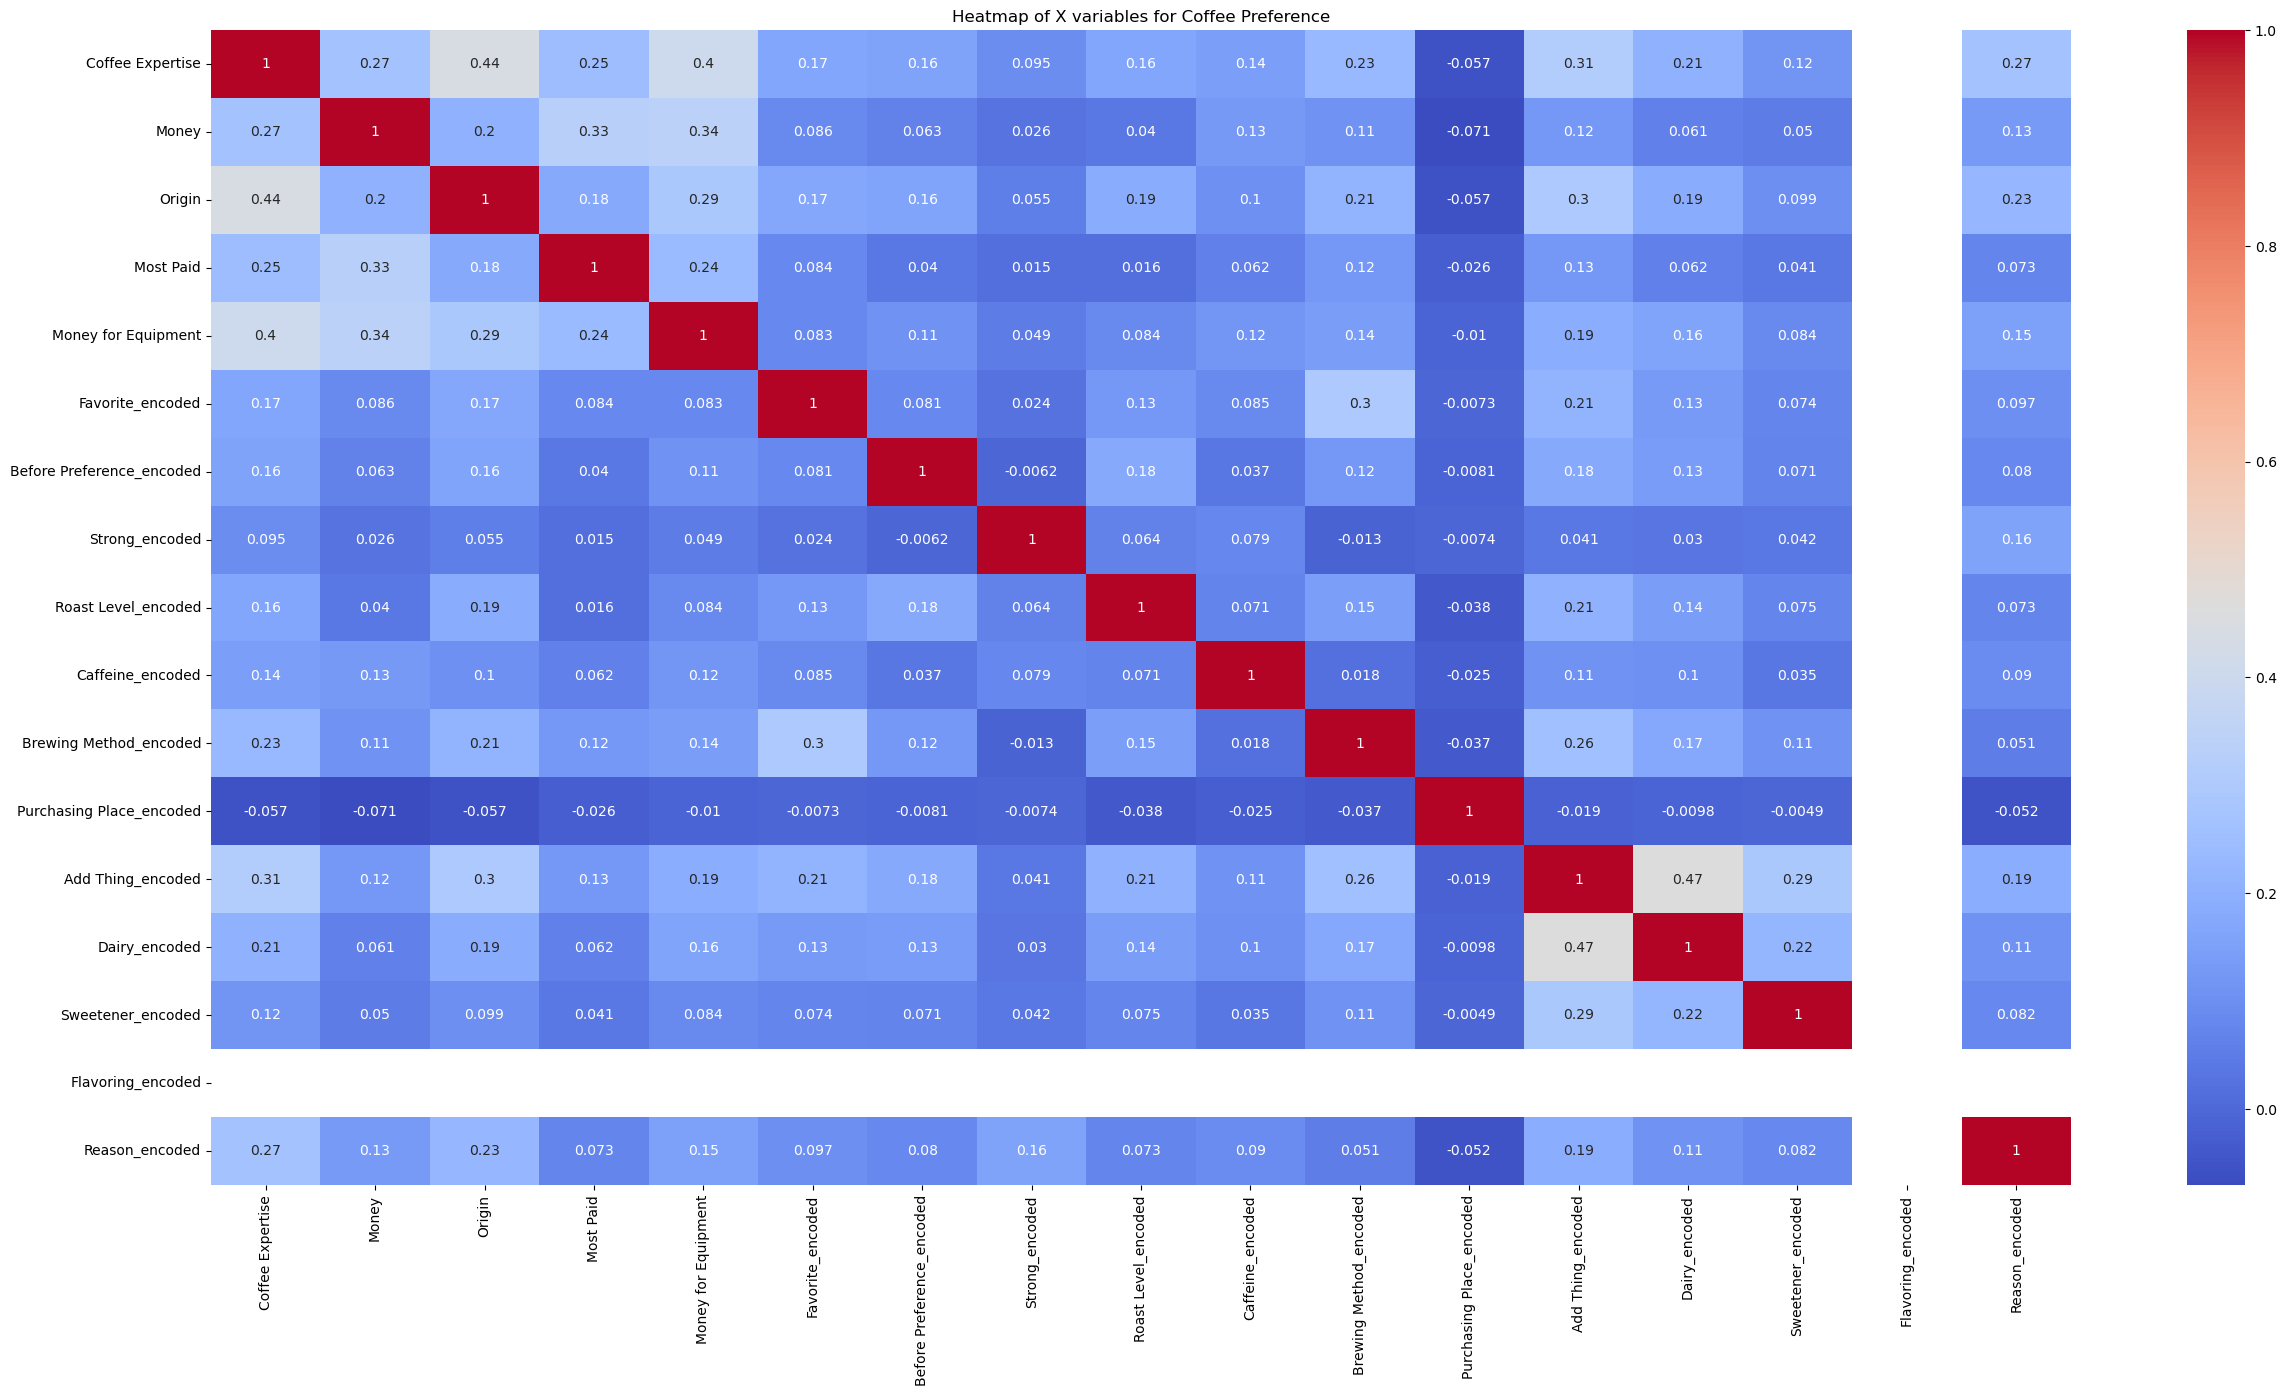

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
# 독립변수 상관관계 히트맵

plt.figure(figsize=(30, 15))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')  
plt.title('Heatmap of X variables for Coffee Preference')  
plt.show()

### 딱히 상관관계가 높은 변수는 없는 것 같음

In [102]:
# 'X' DataFrame을 CSV 파일로 저장
X.to_csv('X_var.csv', index=False)

print("파일이 저장되었습니다: X_var.csv")

파일이 저장되었습니다: X_var.csv


In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_data = scaler.fit_transform(X)

# 정규화된 데이터를 데이터프레임으로 변환
X_df = pd.DataFrame(X_data, columns=X.columns)
X_df

,Coffee Expertise,Money,Origin,Most Paid,Money for Equipment,Favorite_encoded,Before Preference_encoded,Strong_encoded,Roast Level_encoded,Caffeine_encoded,Brewing Method_encoded,Purchasing Place_encoded,Add Thing_encoded,Dairy_encoded,Sweetener_encoded,Flavoring_encoded,Reason_encoded
0,1.172056,-0.603129,0.549482,-0.904304,0.519968,-0.435135,-1.182676,0.023352,0.652058,0.29974,0.706294,-3.020165,0.688173,0.515616,0.236767,0.0,0.240916
1,2.213609,0.182862,0.549482,-1.307147,-1.051275,1.440601,-1.182676,0.023352,0.652058,0.29974,0.706294,0.325407,0.688173,0.515616,0.236767,0.0,0.240916
2,0.130503,-0.603129,0.549482,0.505643,-0.760304,-1.188071,1.565631,-1.915599,0.652058,0.29974,0.706294,0.325407,0.688173,0.515616,0.236767,0.0,0.240916
3,0.651280,0.182862,0.549482,0.505643,-0.294750,1.440601,-0.251733,0.743281,-2.082447,0.29974,0.706294,0.325407,0.688173,0.515616,0.236767,0.0,0.240916
4,-0.911050,0.968853,0.549482,-0.501462,1.567463,-0.646485,-1.182676,0.743281,-2.705356,0.29974,-1.258842,0.325407,-1.286003,0.515616,0.236767,0.0,0.240916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3367,-1.952603,-0.603129,-1.819896,-0.501462,-1.202580,-0.435135,0.314929,0.023352,0.107856,0.29974,-1.433075,0.325407,-1.286003,-2.032292,0.236767,0.0,0.240916
3368,-1.952603,-0.603129,-1.819896,-0.904304,-1.202580,-0.435135,-0.786013,0.023352,0.652058,0.29974,-1.433075,0.325407,-1.286003,-2.032292,0.236767,0.0,-4.107354
3369,-0.390274,0.182862,0.549482,-0.098620,-0.294750,0.304592,-0.810299,0.743281,0.652058,0.29974,-1.258842,0.325407,0.688173,-2.045076,0.236767,0.0,0.240916
3370,0.130503,-0.603129,0.549482,-0.904304,-0.760304,-1.188071,-0.786013,0.743281,0.107856,0.29974,0.706294,0.325407,-1.286003,0.515616,0.236767,0.0,0.240916


In [111]:
X_df.describe()

,Coffee Expertise,Money,Origin,Most Paid,Money for Equipment,Favorite_encoded,Before Preference_encoded,Strong_encoded,Roast Level_encoded,Caffeine_encoded,Brewing Method_encoded,Purchasing Place_encoded,Add Thing_encoded,Dairy_encoded,Sweetener_encoded,Flavoring_encoded,Reason_encoded
count,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3.372000e+03,3372.0,3.372000e+03
mean,1.833251e-16,-8.850176e-17,-7.085409e-17,1.685748e-17,6.347894e-17,4.003651e-17,2.739340e-17,2.412727e-16,9.587691e-17,7.585866e-17,-2.107185e-18,-2.138793e-16,2.054505e-17,-2.349511e-16,1.169488e-16,0.0,1.222167e-16
std,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,1.000148e+00,0.0,1.000148e+00
min,-2.473380e+00,-1.389121e+00,-1.819896e+00,-1.709989e+00,-1.202580e+00,-1.491887e+00,-1.182676e+00,-2.635528e+00,-2.804302e+00,-3.373989e+00,-1.650603e+00,-3.229483e+00,-3.036219e+00,-2.082444e+00,-4.273707e+00,0.0,-4.244163e+00
25%,-3.902736e-01,-6.031293e-01,5.494820e-01,-5.014622e-01,-7.603038e-01,-7.356488e-01,-8.102988e-01,2.335163e-02,1.078556e-01,2.997399e-01,-1.258842e+00,3.254072e-01,-1.286003e+00,5.156158e-01,2.367669e-01,0.0,2.409161e-01
50%,1.305030e-01,1.828618e-01,5.494820e-01,-9.861989e-02,-2.947504e-01,-4.351348e-01,-2.517327e-01,2.335163e-02,1.078556e-01,2.997399e-01,7.062938e-01,3.254072e-01,6.881733e-01,5.156158e-01,2.367669e-01,0.0,2.409161e-01
75%,6.512796e-01,1.828618e-01,5.494820e-01,5.056435e-01,5.199681e-01,1.440601e+00,3.149287e-01,7.432809e-01,6.520581e-01,2.997399e-01,7.062938e-01,3.254072e-01,6.881733e-01,5.156158e-01,2.367669e-01,0.0,2.409161e-01
max,2.213609e+00,2.933831e+00,5.494820e-01,4.131224e+00,1.567463e+00,1.440601e+00,1.565631e+00,7.432809e-01,6.520581e-01,2.997399e-01,7.062938e-01,3.254072e-01,6.881733e-01,5.156158e-01,2.367669e-01,0.0,2.409161e-01


In [103]:
y

,Coffee A - Personal Preference,Coffee B - Personal Preference,Coffee C - Personal Preference,Coffee D - Personal Preference,"Lastly, what was your favorite overall coffee?"
34,4.0,5.0,3.0,3.0,Coffee B
41,4.0,4.0,4.0,4.0,Coffee A
42,3.0,4.0,1.0,5.0,Coffee D
43,4.0,2.0,2.0,2.0,Coffee A
46,5.0,4.0,4.0,3.0,Coffee A
...,...,...,...,...,...
4037,5.0,3.0,4.0,1.0,Coffee A
4038,4.0,2.0,2.0,2.0,Coffee A
4039,3.0,4.0,1.0,5.0,Coffee C
4040,4.0,3.0,3.0,2.0,Coffee A


In [ ]:
### 다항 로지스틱 회귀 사용해서 커피경험이 커피선호도에 미치는 영향 조사

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

result = y['Lastly, what was your favorite overall coffee?']  # 가장 선호하는 커피

# 종속 변수 숫자 인코딩
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(result)

# 다항 로지스틱 회귀 모델 학습
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_df, y_encoded)

# 커피경험변수별 계수 출력
coefficients = pd.DataFrame(
    model.coef_,
    columns=['Coffee Expertise', 'Money', 'Origin', 'Most Paid', 'Money for Equipment', 'Favorite_encoded', 'Before Preference_encoded', 
             'Strong_encoded', 'Roast Level_encoded', 'Caffeine_encoded', 'Brewing Method_encoded', 
             'Purchasing Place_encoded', 'Add Thing_encoded', 'Dairy_encoded', 'Sweetener_encoded', 'Flavoring_encoded', 'Reason_encoded'],
    index=label_encoder.inverse_transform(range(len(model.classes_)))
)

# 데이터의 각 행에 대해 각 커피를 선호할 확률 계산
predicted_probabilities = model.predict_proba(X)

# 기존 데이터 확률 결과를 데이터프레임으로 변환
prob_df = pd.DataFrame(
    predicted_probabilities,
    columns=label_encoder.inverse_transform(range(len(model.classes_)))
)

# 결과 저장
coefficients.to_csv("coffee_preference_coefficients.csv", index=True)
prob_df.to_csv("coffee_preference_probabilities.csv", index=False)

print("Coefficients:")
print(coefficients)
print("\nPredicted Probabilities:")
print(prob_df)


Coefficients:
          Coffee Expertise     Money    Origin  Most Paid  \
Coffee A          0.037222  0.051493  0.022436   0.026441   
Coffee B         -0.122253 -0.010896 -0.089819  -0.091328   
Coffee C          0.008006 -0.084629 -0.010241  -0.006523   
Coffee D          0.077025  0.044031  0.077624   0.071410   

          Money for Equipment  Favorite_encoded  Before Preference_encoded  \
Coffee A             0.091967          0.057097                  -0.077983   
Coffee B            -0.029585         -0.046177                  -0.108045   
Coffee C            -0.135618         -0.048377                  -0.138105   
Coffee D             0.073236          0.037457                   0.324134   

          Strong_encoded  Roast Level_encoded  Caffeine_encoded  \
Coffee A       -0.049384             0.142394          0.002904   
Coffee B        0.019928            -0.205029          0.006040   
Coffee C        0.034494            -0.156036          0.019703   
Coffee D       -0.005

In [118]:
y_sum = y.drop(['Lastly, what was your favorite overall coffee?'], axis=1)
# 각 열의 합계 계산
sums = y_sum.sum()

# 합계 비교 데이터프레임 생성
sum_df = pd.DataFrame({
    'Coffee': sums.index,
    'Sum': sums.values
}).sort_values(by='Sum', ascending=False).reset_index(drop=True)

print("\n합계 비교 데이터프레임:")
print(sum_df)


합계 비교 데이터프레임:
                           Coffee      Sum
0  Coffee D - Personal Preference  11443.0
1  Coffee A - Personal Preference  11215.0
2  Coffee B - Personal Preference  10363.0
3  Coffee C - Personal Preference  10313.0


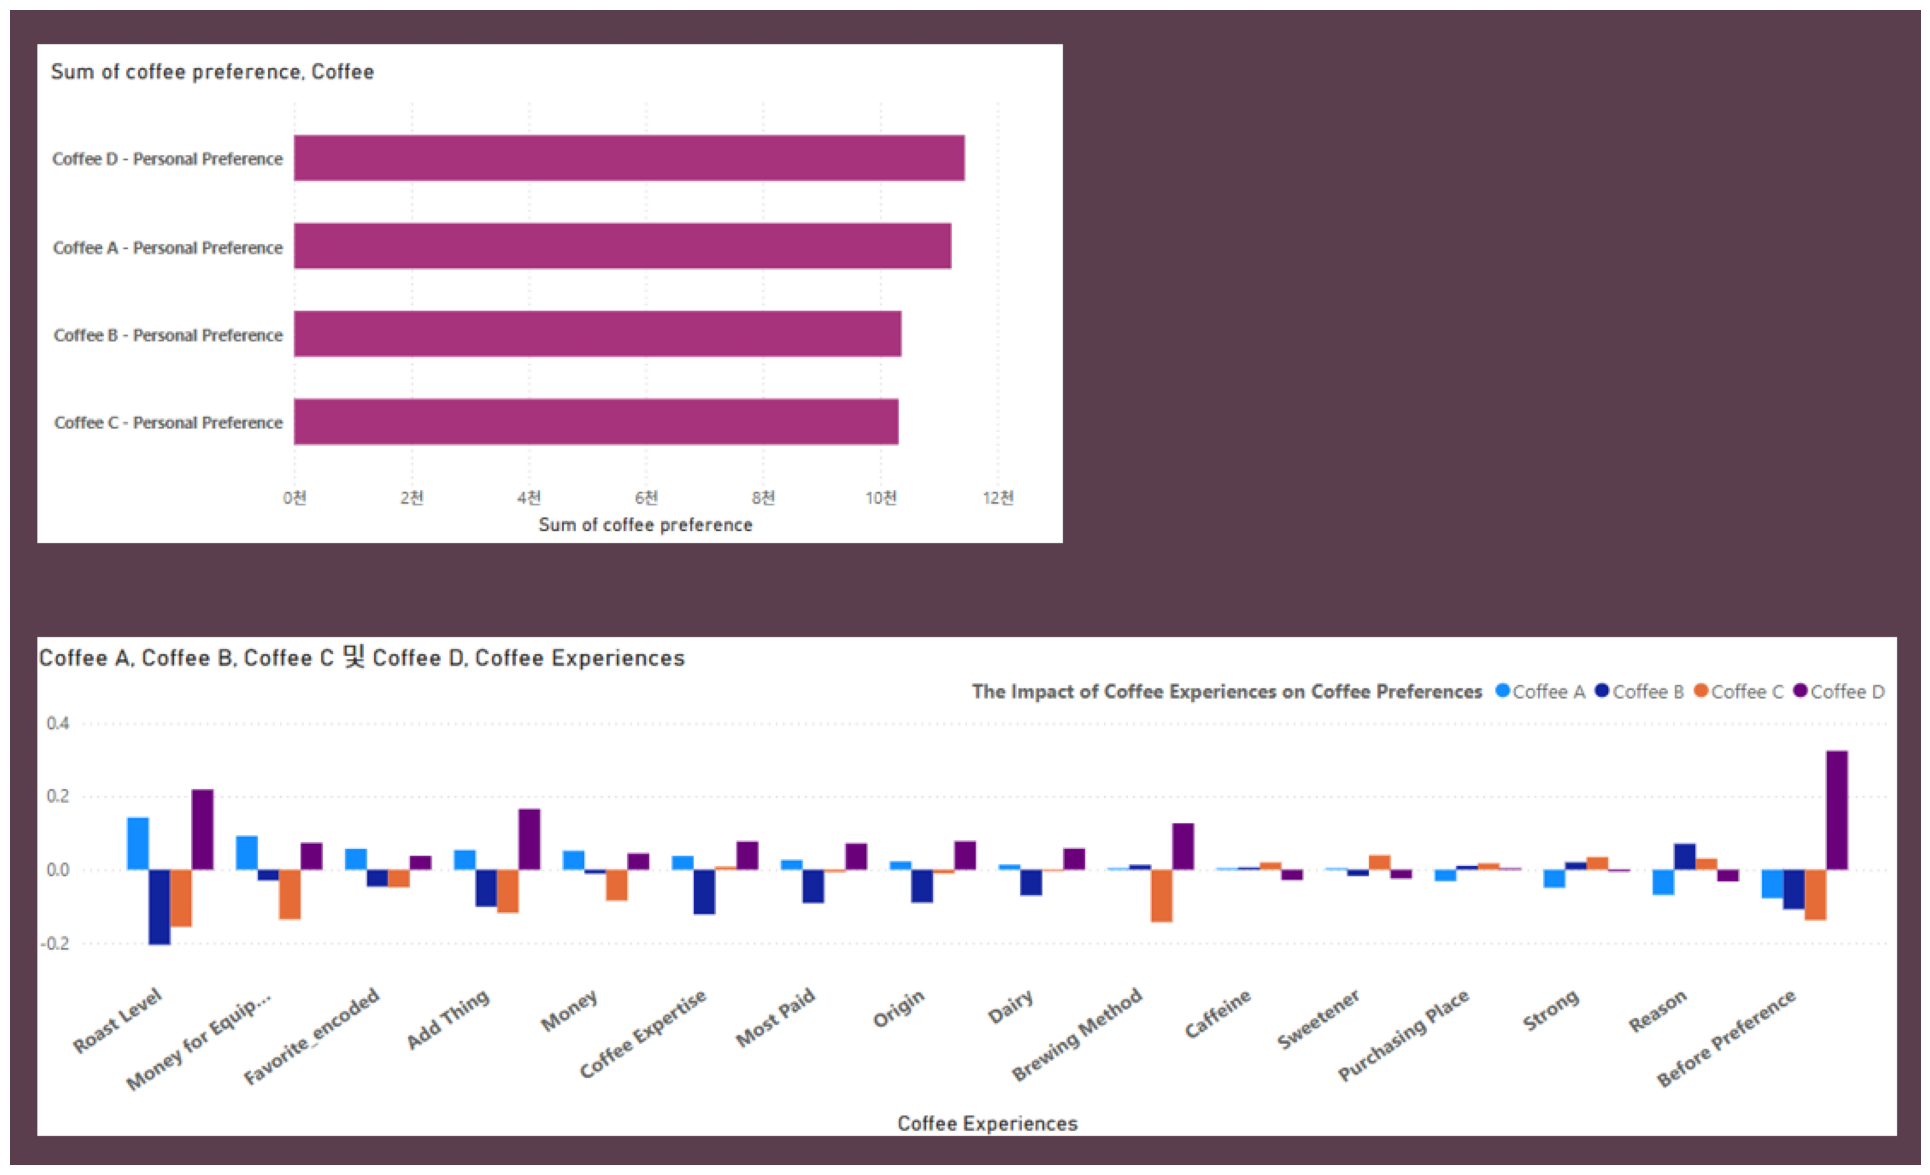

In [120]:
import matplotlib.image as mpimg
image_path = '시각화.png'
img = mpimg.imread(image_path)
plt.figure(figsize=(30, 15))
plt.imshow(img)
plt.axis('off')  
plt.show()

### 위 그래프는 각 커피종류를 최애로 꼽은 사람의 수 비교, Coffee D가 제일 많음.
### 아래 그래프는 커피선호도에 대한 커피 경험의 영향(계수) 시각화
양수 계수는 해당 변수가 특정 커피를 선호하는 데 긍정적 영향을 미침을 나타냄.\
음수 계수는 해당 변수가 특정 커피 선호도를 낮추는 데 영향을 미침을 나타냄.